<a href="https://colab.research.google.com/github/RayOfLight07/Minor_Projects/blob/main/Smart_City_Energy_Analytics_AI_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Smart City Energy Analytics Project**

Objective:
Predict energy consumption and detect anomalies in smart city energy usage.

Dataset:
Smart Home Energy Dataset.

Steps:
1.Data Exploration (Experiments 4, 5)

2.Import the dataset and summarize key attributes.
Perform EDA to understand energy patterns and trends.
Data Preprocessing (Experiments 6, 7)

3.Handle missing values and outliers.
Scale features and encode categorical variables.
Dimensionality Reduction (Experiment 8)

4.Apply PCA to simplify the dataset while retaining essential features.
Handle Imbalanced Data (Experiment 9)

5.Use techniques like SMOTE to address rare energy anomalies.
Model Development

6.Regression (Experiment 1): Predict energy consumption.
Classification (Experiment 2): Identify anomalies or unusual patterns.
Data Visualization (Experiment 10)

Visualize energy usage trends and anomalies with advanced plots.

In [ ]:
pip install pandas numpy scikit-learn seaborn matplotlib imbalanced-learn


# **Importing the Dataset**

In [ ]:
from google.colab import files
ss= files.upload()

Saving Smart_CIity_Energy_Analytics_data.csv to Smart_CIity_Energy_Analytics_data.csv


## **Part 1: Data Loading and Exploration**

Data Summary:
              time  temperature     humidity  appliance_usage    occupancy  \
count  1000.000000  1000.000000  1000.000000      1000.000000  1000.000000   
mean     11.432000    24.891790    60.699640         2.768540     2.437000   
std       7.147199     5.698523    17.176624         1.298933     1.734081   
min       0.000000    15.000000    30.030000         0.510000     0.000000   
25%       5.000000    19.770000    46.112500         1.640000     1.000000   
50%      12.000000    25.015000    61.550000         2.810000     2.000000   
75%      18.000000    29.790000    75.680000         3.920000     4.000000   
max      23.000000    34.940000    89.980000         4.990000     5.000000   

          holiday  energy_consumption  
count  1000.00000         1000.000000  
mean      0.19200            4.603980  
std       0.39407            1.059695  
min       0.00000            1.820000  
25%       0.00000            3.847500  
50%       0.00000            4.645000  
75%

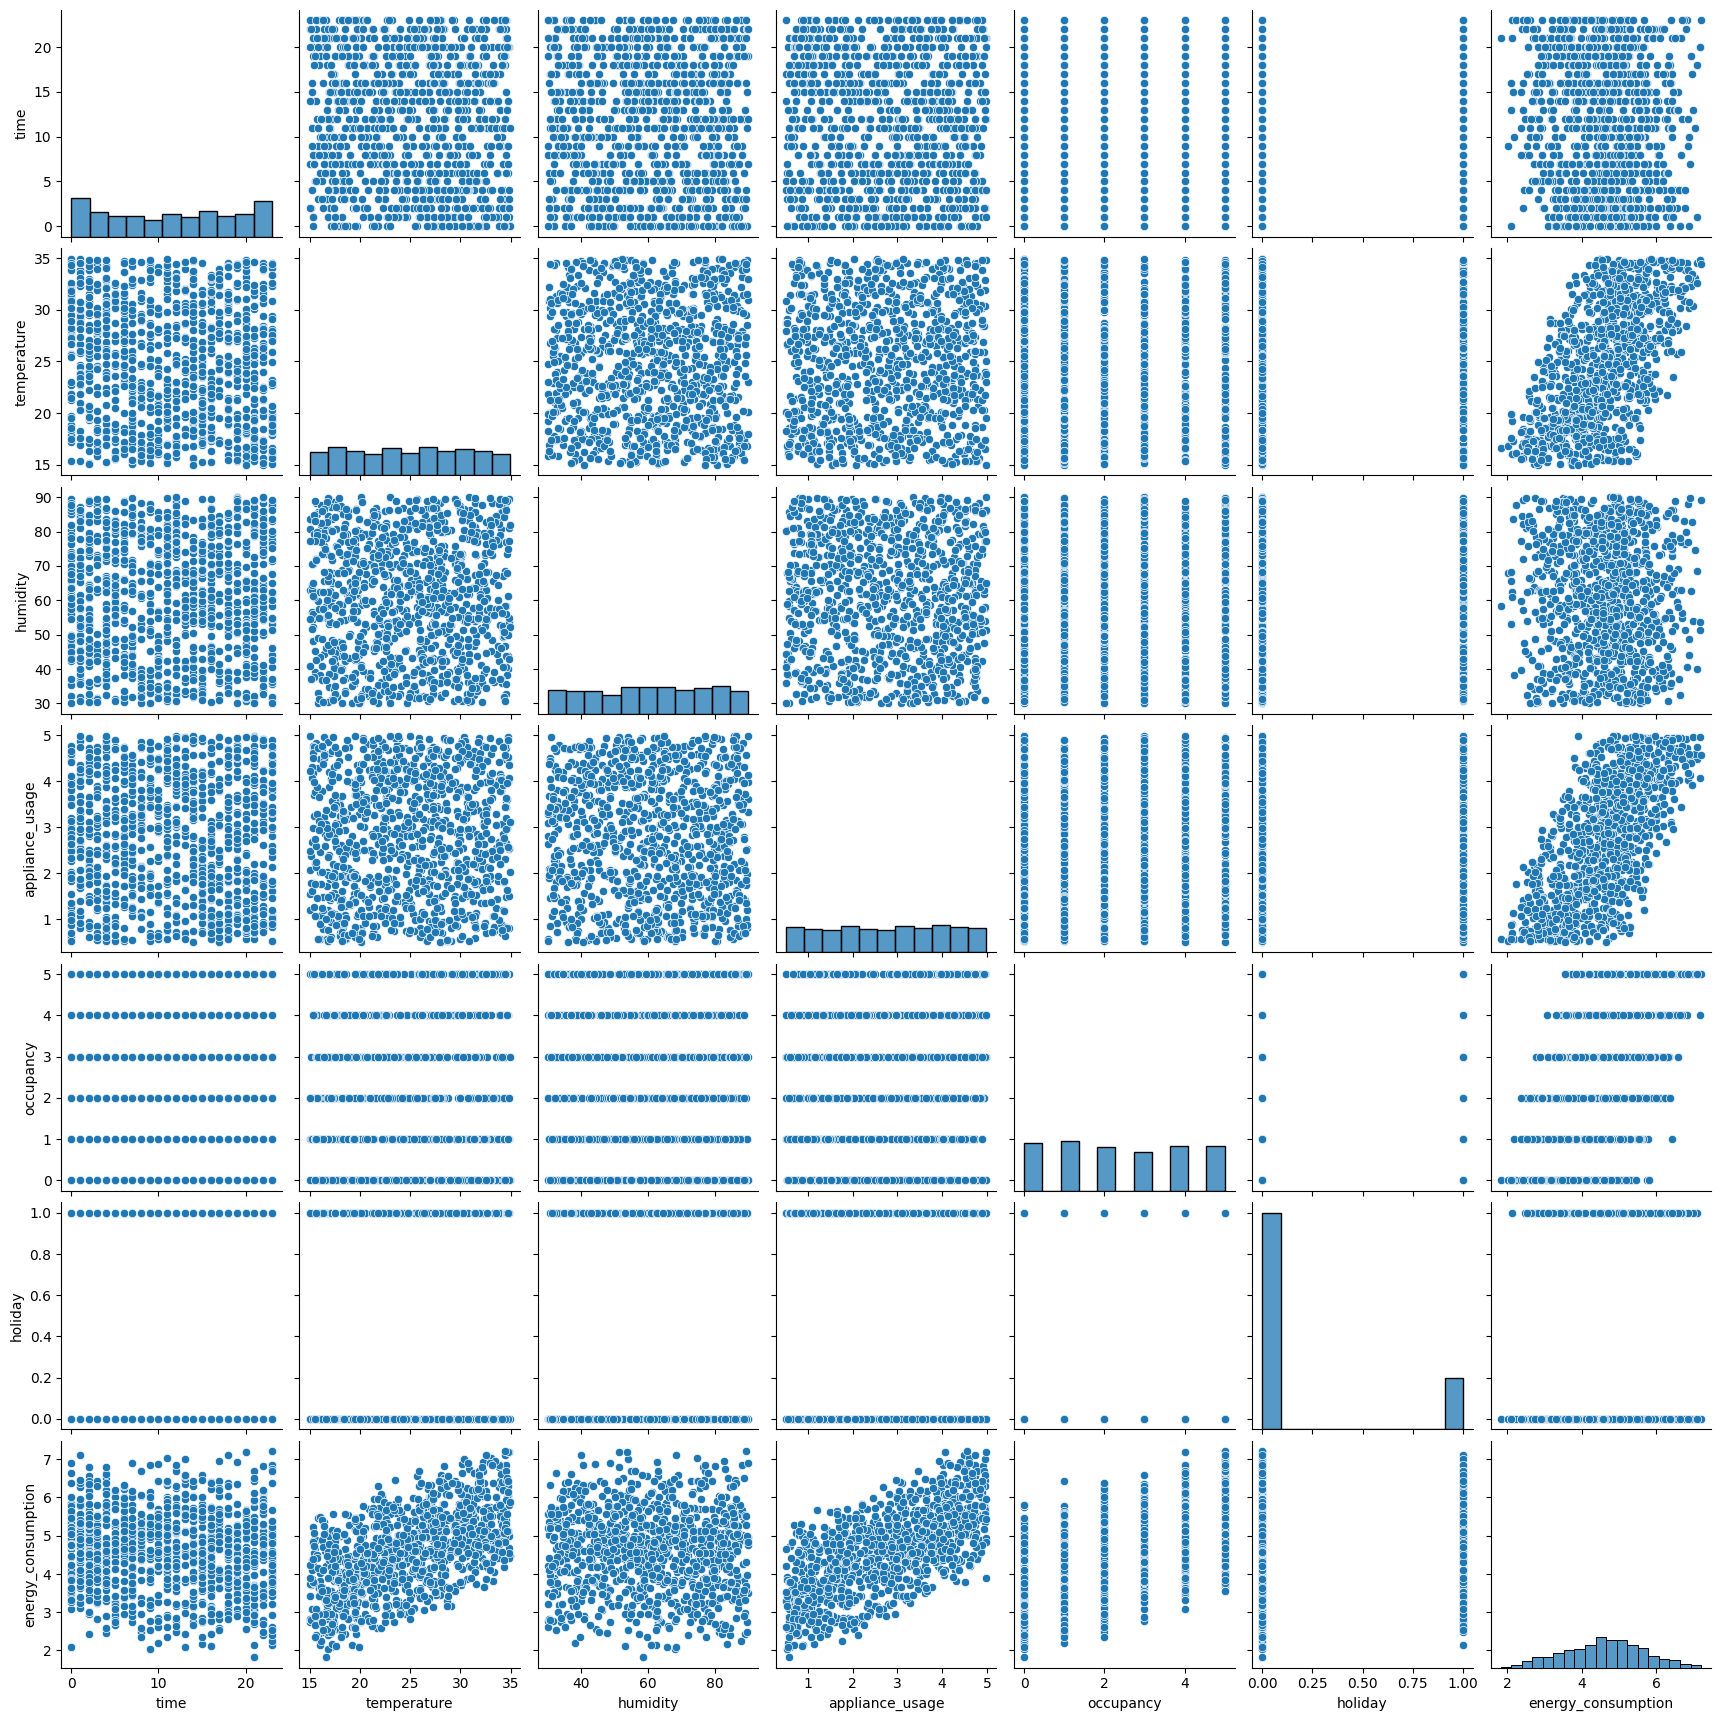

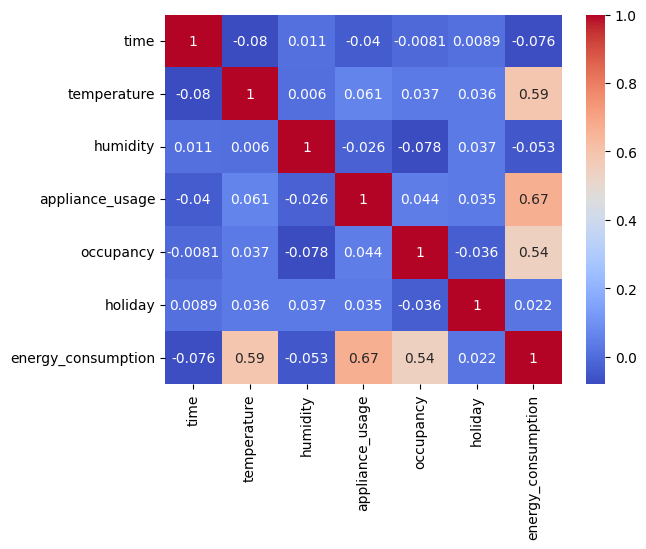

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the synthetic energy dataset
data = pd.read_csv('Smart_CIity_Energy_Analytics_data.csv')

# Data Summary
print("Data Summary:")
print(data.describe())

# Checking for missing values
print("Missing Values:")
print(data.isnull().sum())

# Visualizing features with pairplot
sns.pairplot(data)
plt.show()

# Correlation heatmap
# Include only numeric features for correlation calculation
numeric_data = data.select_dtypes(include=np.number)  # Select numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.show()


# **Part 2: Data Preprocessing (Handling Missing Values, Outliers, and Feature Scaling)**

In [ ]:
# Separate numerical and non-numerical columns
numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = data.select_dtypes(include=["object", "category"]).columns

# Handle Missing Values
# Fill numerical columns with their mean
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())
# Fill categorical columns with the mode
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Handle Outliers using IQR method
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_removed = ~((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[outliers_removed]

# Feature Scaling (for numerical variables)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Show the updated dataset
print("Updated Dataset after Preprocessing:")
print(data.head())



Updated Dataset after Preprocessing:
       time  temperature  humidity  appliance_usage  occupancy  holiday  \
1  1.062476    -0.196800 -0.570262         1.584063  -1.411707      0.0   
2  0.363388     1.723252 -1.176310         0.968644  -0.267615      0.0   
3 -0.195883    -1.183807 -1.156797         0.392176   1.448522      0.0   
4 -0.615336    -0.087132  1.521060         1.256878  -0.839661      0.0   
5  1.202294     0.664873 -0.210996         0.610299  -0.267615      0.0   

   energy_consumption  day_Monday  day_Saturday  day_Sunday  day_Thursday  \
1            0.254292        True         False       False         False   
2            1.385222       False         False       False         False   
3            0.377839       False          True       False         False   
4            0.330321       False          True       False         False   
5            0.539401       False         False       False         False   

   day_Tuesday  day_Wednesday  
1        False   

# **Part 3: Dimensionality Reduction (PCA)**

Explained Variance Ratio: [0.34984179 0.17983596]


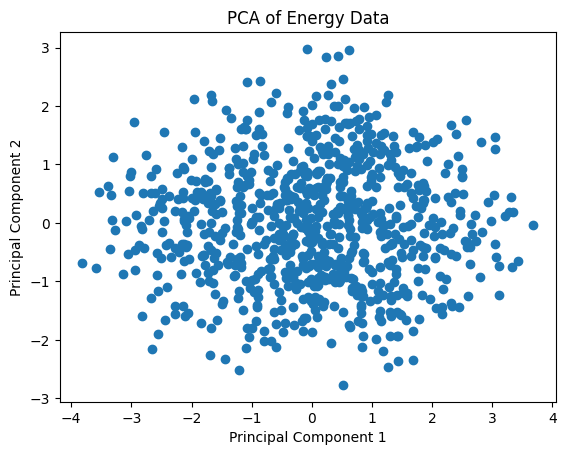

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualizing the first two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA of Energy Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# **Part 4: Handling Imbalanced Data (SMOTE for Anomaly Detection)**

In [ ]:
from imblearn.over_sampling import SMOTE

# Simulate an anomaly target variable (mark top 5% as anomalies)
data['anomaly'] = (data['energy_consumption'] > data['energy_consumption'].quantile(0.95)).astype(int)

# Define features and target for anomaly detection
X = data.drop(['energy_consumption', 'anomaly'], axis=1)
y = data['anomaly']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Original class distribution:\n", y.value_counts())
print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())


Original class distribution:
 anomaly
0    767
1     41
Name: count, dtype: int64
Resampled class distribution:
 anomaly
0    767
1    767
Name: count, dtype: int64


# **Part 5: Model Training (Regression and Classification)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report

# Regression Model (Predicting Energy Consumption)
X_reg = data.drop(['energy_consumption', 'anomaly'], axis=1)
y_reg = data['energy_consumption']

# Split into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg_model.predict(X_test_reg)
print("Regression Model Evaluation:")
print("R² Score:", r2_score(y_test_reg, y_pred_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))

# Classification Model (Anomaly Detection)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the classification model
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predict and evaluate
y_pred_clf = clf_model.predict(X_test_clf)
print("Classification Model Evaluation:")
print(classification_report(y_test_clf, y_pred_clf))


Regression Model Evaluation:
R² Score: 0.9895943731761883
Mean Squared Error: 0.009813830866519681
Classification Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       145
           1       0.99      1.00      1.00       162

    accuracy                           1.00       307
   macro avg       1.00      1.00      1.00       307
weighted avg       1.00      1.00      1.00       307



# **Part 6: Data Visualization (Regression and Classification Results)**

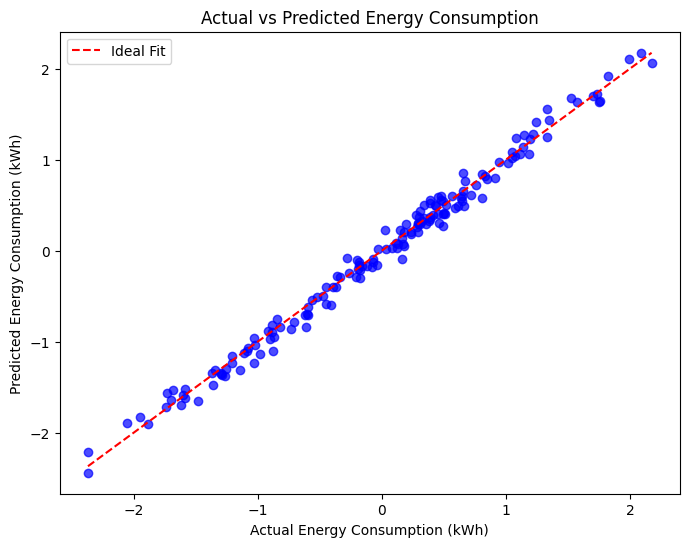

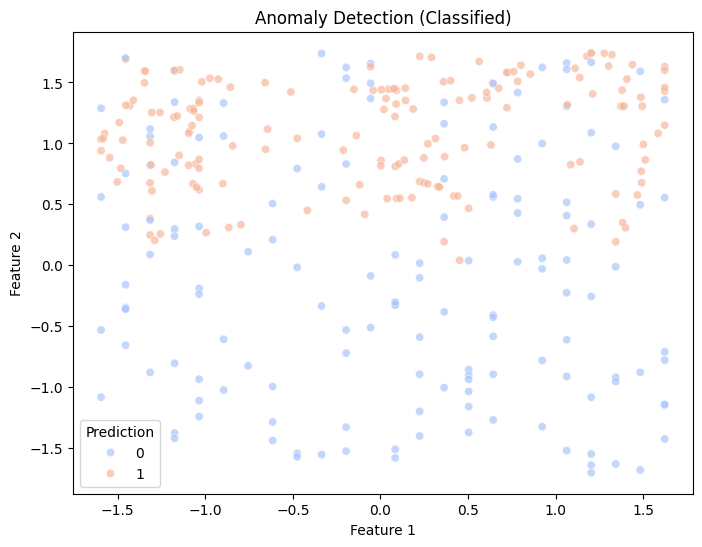

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Predicted vs Actual Energy Consumption (Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, color='blue')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], '--r', label='Ideal Fit')
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Actual Energy Consumption (kWh)")
plt.ylabel("Predicted Energy Consumption (kWh)")
plt.legend()
plt.show()

# Visualizing Anomalies Detected by the Classifier
# Convert to NumPy array if X_test_clf is a DataFrame
if isinstance(X_test_clf, pd.DataFrame):
    X_test_clf = X_test_clf.values

# Ensure X_test_clf has at least two dimensions for scatterplot
if X_test_clf.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=X_test_clf[:, 0],
        y=X_test_clf[:, 1],
        hue=y_pred_clf,
        palette='coolwarm',
        alpha=0.7
    )
    plt.title('Anomaly Detection (Classified)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Prediction')
    plt.show()
else:
    print("Cannot visualize anomalies: Dataset has fewer than 2 dimensions.")


